<a href="https://colab.research.google.com/github/asrianda/latAlgoritma/blob/main/Algortima_A5_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('titanic_data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df_pilih=df[['survived','pclass','sex','age','sibsp',
             'parch','fare','embarked']].copy()

In [19]:
df_pilih.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


In [31]:
df_pilih.shape

(889, 8)

In [16]:
#-- Menghilangkan data yang kosong --
df_pilih['age'].fillna(df_pilih['age'].mean(),inplace=True)
df_pilih['embarked'].fillna(df_pilih['embarked'].mode()[0],inplace=True)
#df_pilih.isnull().sum()


<ipython-input-16-0698d5738876>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pilih['age'].fillna(df_pilih['age'].mean(),inplace=True)
<ipython-input-16-0698d5738876>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enkorder=OrdinalEncoder()
df_pilih[['sex','embarked']]=enkorder.fit_transform(df_pilih[['sex','embarked']])

In [24]:
#-- Memisahkan fitur dan target
X=df_pilih.drop('survived',axis=1)
y=df_pilih['survived']

In [42]:
#-- Pemisahan Data (Split Data) --
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [45]:
#-- Membuat Metode ID3 --
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
clf=DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
#-- Melakukan Prediksi dan Laporan Klasifikasi --
y_pred=clf.predict(X_test)
report=classification_report(y_test,y_pred, target_names=['No Survive','Survive'])
akurasi=accuracy_score(y_test,y_pred)
print('Akurasi:',akurasi)
print(report)


Akurasi: 0.7852564102564102
              precision    recall  f1-score   support

  No Survive       0.83      0.81      0.82       188
     Survive       0.72      0.75      0.74       124

    accuracy                           0.79       312
   macro avg       0.78      0.78      0.78       312
weighted avg       0.79      0.79      0.79       312



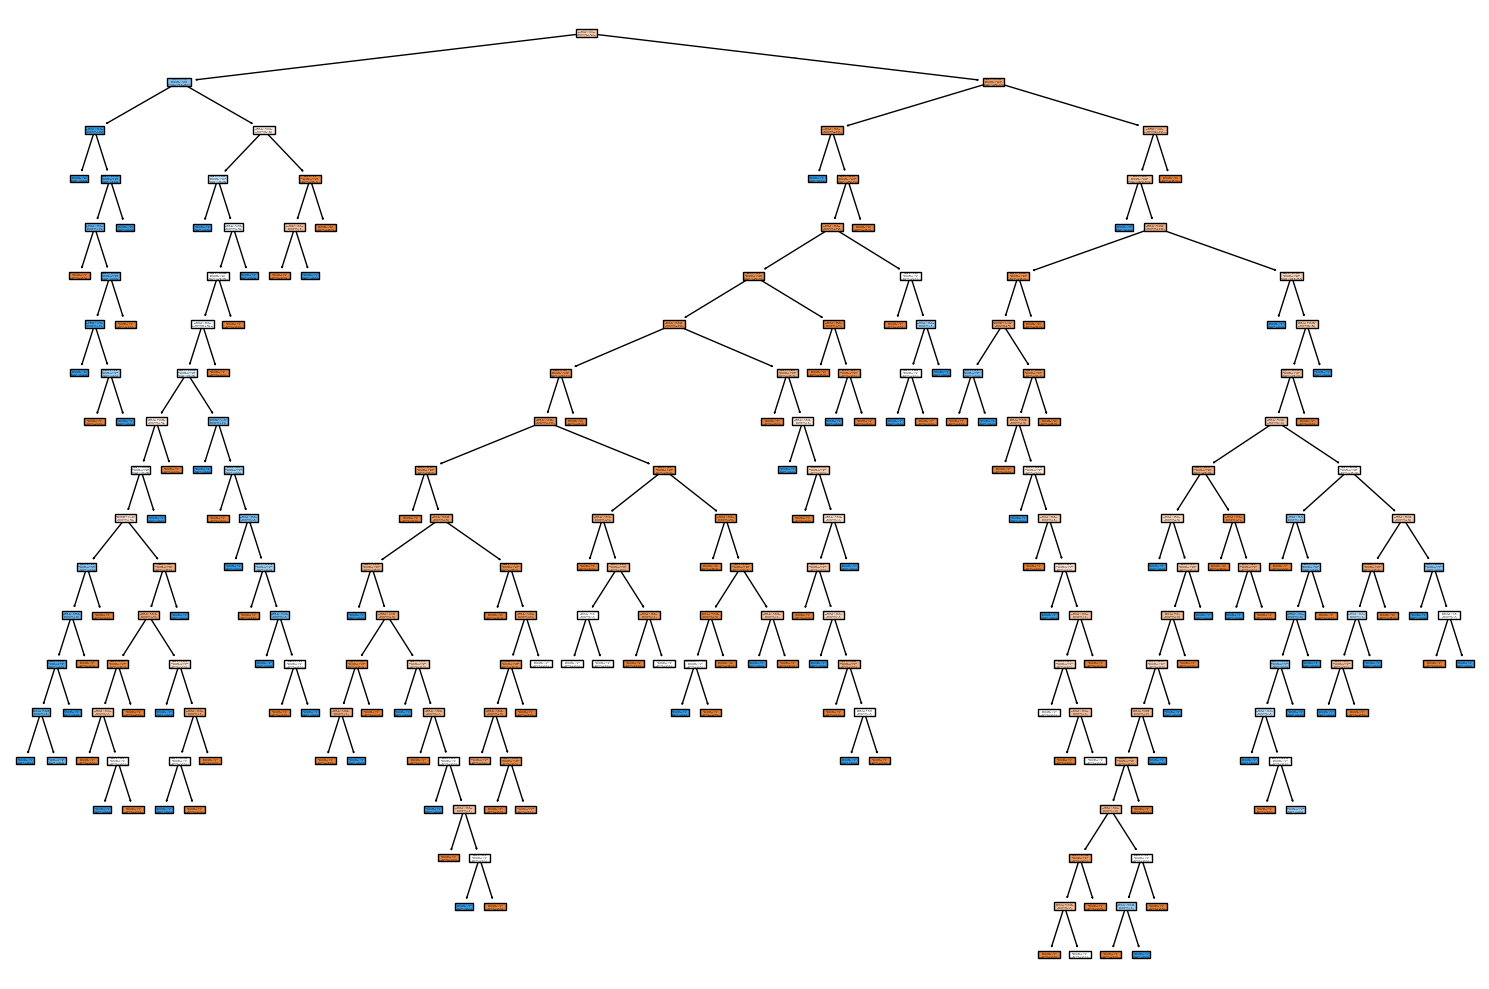

In [49]:
#-- Visualisasi Pohon Keputusan --
plt.figure(figsize=(15,10))
plt.title('Titanic Decision Tree Classifier')
plot_tree(clf,filled=True,feature_names=X.columns,class_names=['No Survive','Survive'])
plt.tight_layout()
plt.show()

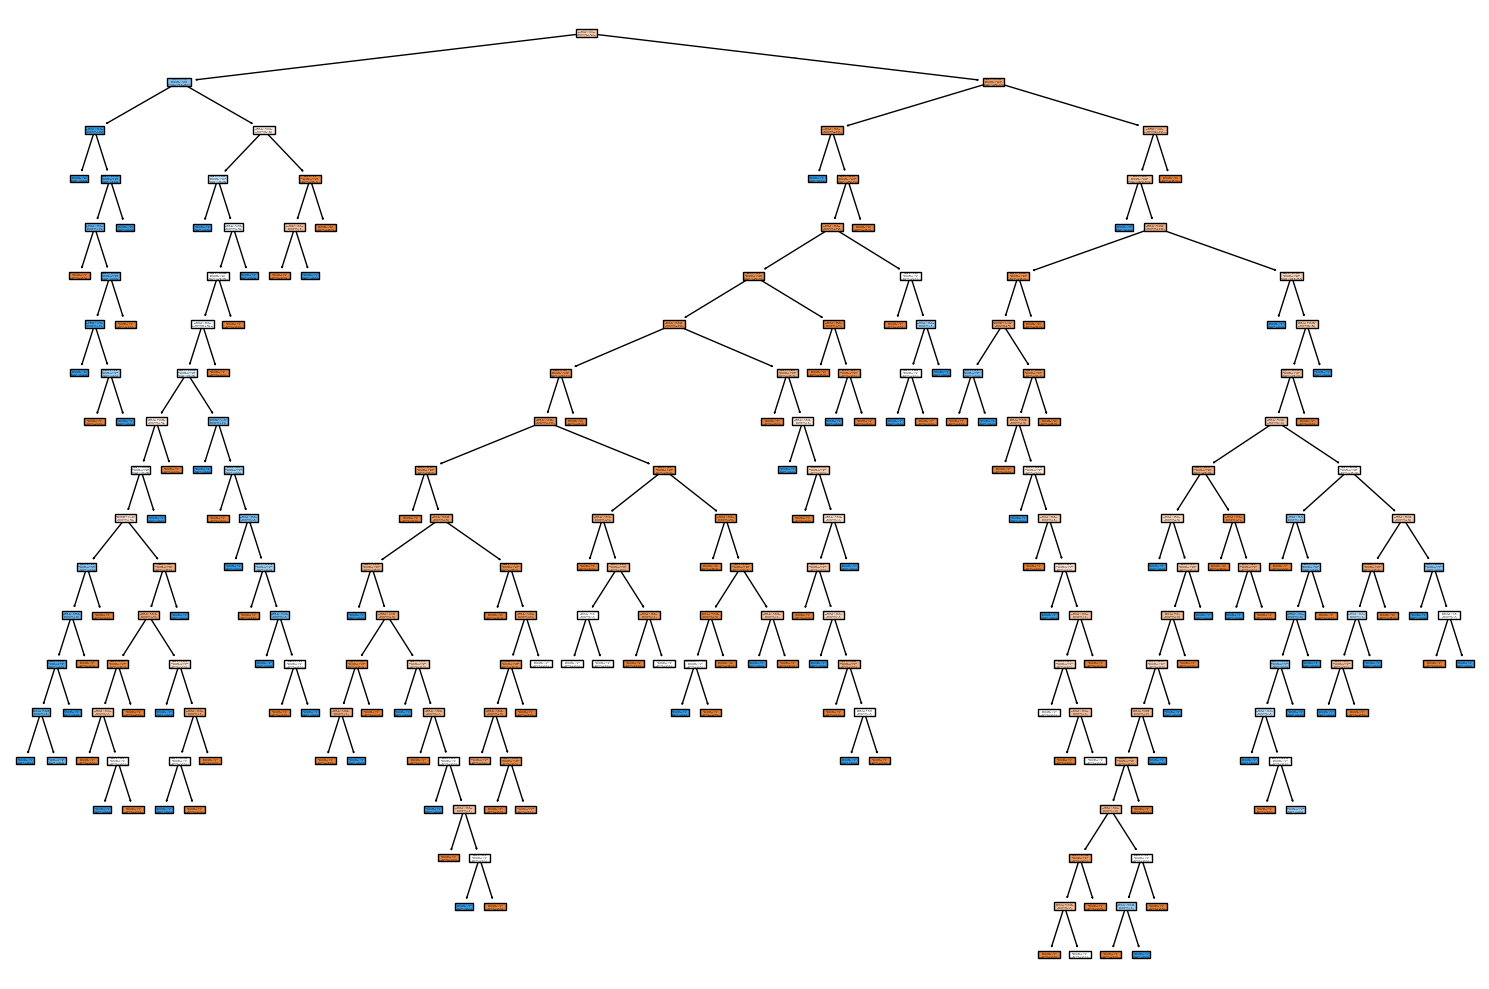

In [50]:
# -- Visualisasi Pohon Keputusan dan Simpan ke File --
plt.figure(figsize=(15, 10))
plt.title('Titanic Decision Tree Classifier')
plot_tree(clf,
          filled=True,
          feature_names=X.columns,
          class_names=['No Survive', 'Survive'])

plt.tight_layout()
plt.savefig("decision_tree_titanic.png", dpi=300)  # Simpan sebagai file PNG
plt.show()

In [32]:
X_test.shape

(178, 7)

In [27]:
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,1


In [17]:
df_pilih.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0


In [11]:
df['fare'].value_counts()

,count
fare,
8.0500,43
13.0000,42
7.8958,37
7.7500,33
26.0000,31
...,...
13.8583,1
50.4958,1
5.0000,1


In [10]:
df['sibsp'].value_counts()

,count
sibsp,
0,607
1,208
2,28
4,18
3,16
8,7
5,5


In [5]:
#df.isnull().sum()
